In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Using the rent prices from appartments in Lausanne from PW 02, restricting to the feature living area.

### Load Data

In [63]:
import pandas as pd
df = pd.read_csv("./lausanne-appart.csv")
N  = df.shape[0]
print(df.head())
df.shape

   living_area  nb_rooms  rent_price
0           69       3.0        1810
1           95       3.5        2945
2           21       1.5         685
3           20       1.0         720
4           33       1.5         830


(201, 3)

### Normalization

In [64]:
x0 = df.values[:,0]
x = (x0-np.mean(x0))/np.std(x0)
y0 = df.values[:,2]
y = (y0-np.mean(y0))/np.std(y0)

Text(0, 0.5, 'rent_price')

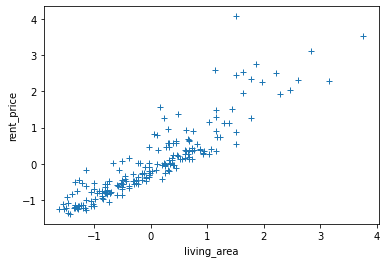

In [65]:
plt.plot(x, y,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

### Linear Model, Normal Equations and Solution

We denote the observed rent by $y_j$ (at time $x_j$) and the model rent by $\hat{y}_j$ we assume 

$\qquad \hat{y}_j = \alpha + \beta x_j$

By minimizing the mean squares error

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

we can fit the straigth line as follows by using the design matrix $X$ and the data vector $Y$, defined by 

$\qquad X = \left(\begin{array}{cc} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{array}\right), \qquad Y = \left(\begin{array}{c} y_0\\ \vdots \\ y_{N-1}\end{array}\right)$

We find 

$\qquad \left(\begin{array}{c}\alpha \\ \beta\end{array}\right) = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$

Hence, here we can easily compute the (linear) model which best fits the training data in the sense of obtaining a minimal mean square error. 

### Solution of Normal Equations in Pytorch

tensor([[-1.9602e-16],
        [ 9.0425e-01]], dtype=torch.float64)


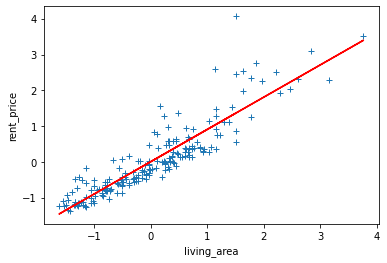

In [66]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.cat((torch.ones(N, 1), torch.tensor(x).reshape(-1,1)), dim=1)
Y = torch.tensor(y).reshape(-1, 1)


# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = torch.inverse(X.T@X)@X.T@Y
# a = torch.linalg.lstsq(Y, X).solution

# # prediction
Yhat = X@a
# Yhat = a[0] + X[:, 1]*a[1]
# # YOUR CODE (END)

# plot
plt.plot(X[:, 1], Y, "+")
plt.plot(X[:, 1], Yhat, 'r')
# plt.plot(X[:, 1], Yhat_2, 'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")
print(a)




$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

#### Cost

In [67]:
def cost(X: torch.Tensor, Y: torch.Tensor, a: torch.Tensor):
    # YOUR CODE (START)
    return torch.pow(torch.sub(Y, X@a), 2).mean().item()
    # YOUR CODE (END)


In [68]:
cost_closed_form = cost(X,Y,a)
print(cost_closed_form)

0.18233305879162032


### Gradient Descent

Specify the gradient of the cost (w.r.t. $\alpha, \beta$) here as maths expression.

In [69]:
def gradient_cost(X, Y, a):
    # YOUR CODE (START)
    N = len(X)
    x = X[:, 1].reshape(-1, 1)
    Yhat = (a[0] + a[1]*x)
    pda = torch.sum(-2*(Y - Yhat))/(2*N)
    pdb = torch.sum(-2*x*(Y - Yhat))/(2*N)
    return torch.tensor([[pda], [pdb]])
    # YOUR CODE (END)


tensor([[-9.5081e-17],
        [ 8.6125e-01]], dtype=torch.float64)
0.18418200081159847


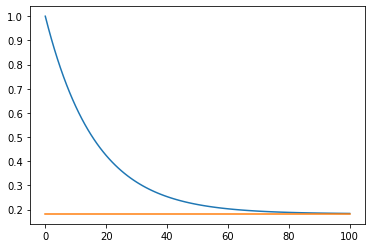

In [70]:
# adjust if needed
nepochs = 100
lr = 0.03

# initial parameter
a = torch.tensor([0.0, 0.0], dtype=torch.float64).reshape(2, 1)

# track the costs
costs = [cost(X, Y, a)]

# YOUR CODE (START)

# loop over the epochs: update parameter values, compute the cost and add it to the costs list
for epoch in range(nepochs):
    a = a - lr * gradient_cost(X, Y, a)
    costs.append(cost(X, Y, a))
print(a)


# YOUR CODE (END)

# some output
cost_gd = costs[-1]
print(cost_gd)
plt.plot(range(nepochs+1), costs)
plt.plot(range(nepochs+1), cost_closed_form*torch.ones(nepochs+1))


### Different Learning Rates

Play with different learning rates: Explore for what learning rates 
- the learning is most efficient
- the learning yet works
- the learning does not work anymore (learning rate too large)

Explain the different scenarios.

- the learning is most efficient
  - Most efficient around 0.03
- the learning yet works
  - The learning works even with 0.000001, but requires much more epochs.
- the learning does not work anymore (learning rate too large)
  - From 0.001 and upwards

tensor([[-9.5081e-17],
        [ 8.6125e-01]], dtype=torch.float64)


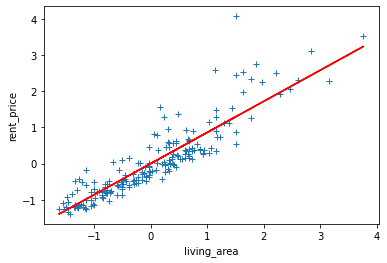

In [71]:
# Final check:

N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.cat((torch.ones(N, 1), torch.tensor(x).reshape(-1,1)), dim=1)
Y = torch.tensor(y).reshape(-1, 1)


# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
# a = torch.inverse(X.T@X)@X.T@Y
# a = torch.linalg.lstsq(Y, X).solution

# # prediction
Yhat = X@a
# Yhat = a[0] + X[:, 1]*a[1]
# # YOUR CODE (END)

# plot
plt.plot(X[:, 1], Y, "+")
plt.plot(X[:, 1], Yhat, 'r')
# plt.plot(X[:, 1], Yhat_2, 'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")
print(a)
